In [22]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Clustering

Ex A+b - cluster the top 150 hotels in the top 40 checkin dates using hierarchical clustering.

1. order by the hotels count and take the top 150.
2. same for checkin dates and take the top 40.

In [23]:
ordered_hotels = pd.read_csv("./Hotels_data_Changed.csv", encoding = "utf8")
top_hotels = ordered_hotels.groupby("Hotel Name").size().reset_index(name="counts")
top_hotels = top_hotels.sort_values("counts", ascending=False).head(150)[["Hotel Name"]]
ordered_hotels = pd.merge(left = top_hotels, right=ordered_hotels,left_on="Hotel Name", right_on="Hotel Name")

top_hotels

,Hotel Name
327,Newark Liberty International Airport Marriott
194,Hilton Garden Inn Times Square
374,Residence Inn Newark Elizabeth Liberty Interna...
538,Westin New York at Times Square
290,Loews Regency New York Hotel
525,Viceroy New York
154,Four Seasons Hotel New York
285,Langham Place New York Fifth Avenue
434,The Carlyle A Rosewood Hotel
112,DoubleTree by Hilton Metropolitan - New York City


In [24]:
top_checkin_dates = ordered_hotels.groupby("Checkin Date").size().reset_index(name="counts")
top_checkin_dates = top_checkin_dates.sort_values("counts", ascending=False).head(40)[["Checkin Date"]]
ordered_hotels = pd.merge(left=top_checkin_dates, right=ordered_hotels, left_on="Checkin Date", right_on="Checkin Date")

top_checkin_dates

,Checkin Date
116,2015-11-11
88,2015-10-14
109,2015-11-04
32,2015-08-19
102,2015-10-28
95,2015-10-21
111,2015-11-06
25,2015-08-12
110,2015-11-05
96,2015-10-22


### Data Preprocessing


In order to fit it to the hierarchical clustering algorithm, we will take the df and process it.
Ex B - we will take the minimal discount price for each hotel for each checkin date.
Then, pivot the df so each row will be hotel, and 160 cols for the combination of checkin date & discount code (40*4=160).

In [25]:
from sklearn import preprocessing

min_price = ordered_hotels.groupby(["Checkin Date", "Hotel Name", "Discount Code"])["Discount Price"].min()
min_price = min_price.to_frame().reset_index()

min_price.head()

,Checkin Date,Hotel Name,Discount Code,Discount Price
0,2015-08-12,Andaz 5th Avenue - a concept by Hyatt,3,1665
1,2015-08-12,Andaz Wall Street - a concept by Hyatt,1,1365
2,2015-08-12,Andaz Wall Street - a concept by Hyatt,2,1325
3,2015-08-12,Andaz Wall Street - a concept by Hyatt,3,1355
4,2015-08-12,Best Western Plus Newark Airport West,1,620


Ex C+D - We will normalize the discount price for each hotel using min max scaler - for 0-100 range. 
(empty value will bw -1)

Finally, save the df to a csv file.

In [26]:
# Normalization method
def normalize(x):
    values = x.values
    values = values.reshape((len(values), 1))
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
    normalized = min_max_scaler.fit_transform(values)
    return pd.Series(list(normalized), index=x.index)

In [27]:
hotelPrices = min_price.groupby("Hotel Name")["Discount Price"]
# print (hotelPrices)
# print (min_price.loc[min_price["Hotel Name"] == "Hampton Inn Times Square North"].sort_values("Discount Price", ascending=False))
hotelPrices = hotelPrices.apply(normalize)
min_price["Discount Price"] = hotelPrices
# print (min_price.loc[min_price["Hotel Name"] == "Hampton Inn Times Square North"].sort_values("Discount Price", ascending=False))
pivot = pd.pivot_table(min_price, values='Discount Price', columns=["Checkin Date", "Discount Code"], index=["Hotel Name"], aggfunc="first")
pivot = pivot.fillna(-1)
pivot.to_csv("./data_to_cluster.csv", encoding = "utf8")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, Dat

## Hierarchical Clustering algorithm

By clustering the data we want to try understanding which hotels has similar discount policies - so we are going to run hierarchical clustering on the processed data. 

We will use scipy & we will create a dendogram (Ex E) of the clusters.

First we calculates the linkage matrix between the rows. The structure of the matrix is 150 * 4 - each row represents a connection between to clusters: the first column is the first cluster index, the second column is second cluster index, the third column is the distance between the clusters, and the fourth is the number of clusters in this new cluster.

In order to understand which distance method is the best for us to use we will compare them:

In [28]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

ward = linkage(pivot, 'ward')
wardc, coph_dists = cophenet(ward, pdist(pivot))
complete = linkage(pivot, 'complete')
completec, coph_dists = cophenet(complete, pdist(pivot))
single = linkage(pivot, 'single')
singlec, coph_dists = cophenet(single, pdist(pivot))
average = linkage(pivot, 'average')
averagec, coph_dists = cophenet(average, pdist(pivot))
weighted = linkage(pivot, 'weighted')
weightedc, coph_dists = cophenet(weighted, pdist(pivot))

print('Ward:' + str(wardc))
print('Complete:' + str(completec))
print('Single:' + str(singlec))
print('Average:' + str(averagec))
print('Weighted:' + str(weightedc))

Ward:0.6291868323937738
Complete:0.7932668499530833
Single:0.834549202662157
Average:0.8800879299365709
Weighted:0.8035904210059271


The average distance method (which is decribed by the average of distances between all the features from cluster a to cluster b) gives us the best Cophenetic Correlation Coefficient (The more closer to 1 - the better)
Which means it highly preserves the original distances between the clusters.

Let's draw a dendogram of the average linkage matrix:

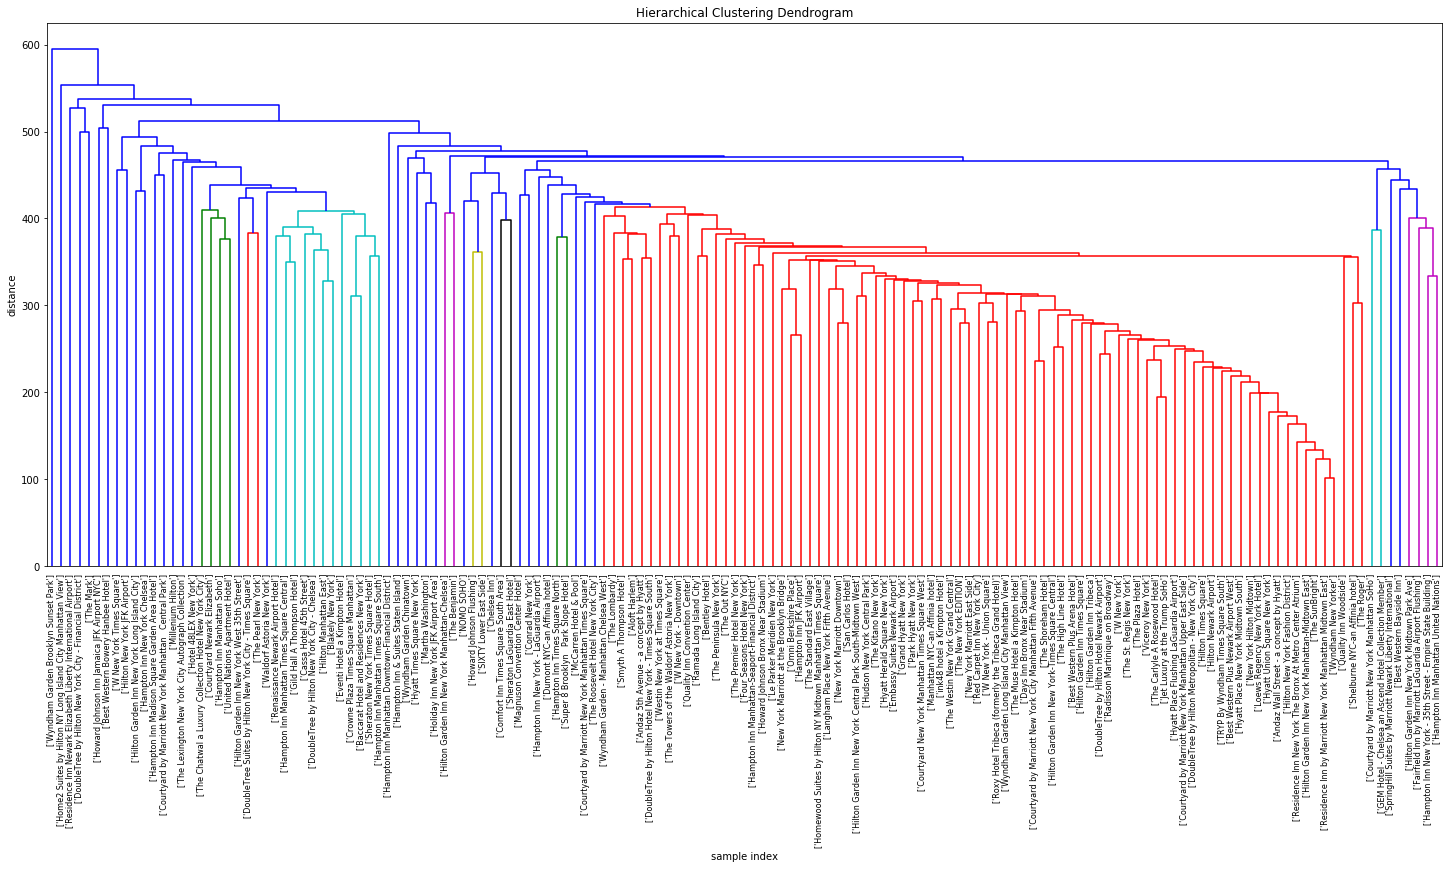

In [29]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,  # show only the last p merged clusters
    show_contracted=True,  # to get a distribution impression in truncated branches
    labels= hotel_count.values
)
plt.show()


### Explanation

The dendogram shows us that there is a big group of hotels (red cluster) that has similar price policy for the same dates. 
By clustering we try to evaluate hotels which has similar prices for the dates taken.